In [3]:
from data import SyntheticTimeSeriesDataset, DatasetConfig, SyntheticTimeSeriesTensorDataset

In [4]:
config = DatasetConfig(
    date_start='2021/10/11 00:00:00', 
    date_end='2021/11/11 00:00:00',
    sampling='H',
    setting='simple',
    seq_length=24,
    horizon=1,
    split_ratio=0.2
)
syn_series = SyntheticTimeSeriesDataset(
    config = config
)

Number of days in the time delta:  31 days 00:00:00
Sampling for number of samples:  744
Index Length:  745 2021-10-11 00:00:00 2021-10-11 01:00:00
dataframe created:  2021-10-11 00:00:00    0.496257
2021-10-11 01:00:00    0.768222
2021-10-11 02:00:00    0.088477
2021-10-11 03:00:00    0.132030
2021-10-11 04:00:00    0.307423
                         ...   
2021-11-10 20:00:00    0.103246
2021-11-10 21:00:00    0.530460
2021-11-10 22:00:00    0.896422
2021-11-10 23:00:00    0.358508
2021-11-11 00:00:00    0.735333
Freq: H, Name: time_series, Length: 745, dtype: float32


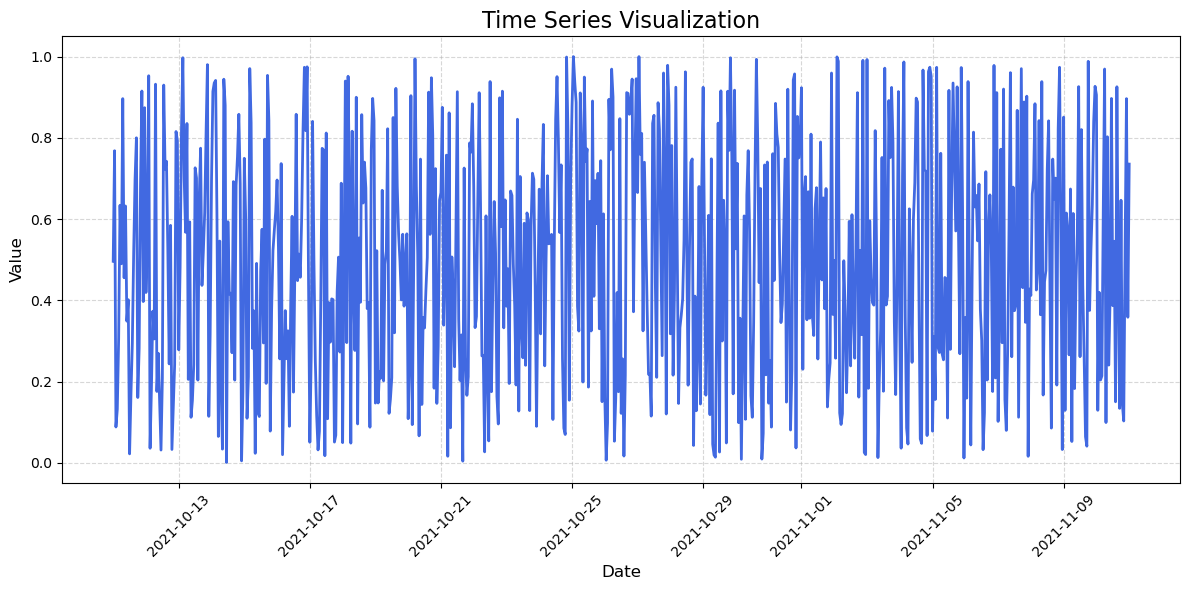

(745, 3) (745,)


In [5]:
X, y = syn_series.create_univariate_dataset()
print(X.shape, y.shape)

In [11]:
from sklearn.model_selection import train_test_split
import torch
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False)

train_ds, test_ds = SyntheticTimeSeriesTensorDataset(config, X_train, y_train), SyntheticTimeSeriesTensorDataset(config, X_test, y_test)

train_dl, test_dl = torch.utils.data.DataLoader(
    train_ds, batch_size=24, num_workers=1
), torch.utils.data.DataLoader(
    test_ds, batch_size=24, num_workers=1
)

In [12]:
for batch in train_dl:
    input, target = batch
    print(input.shape, target.shape)

    break

torch.Size([24, 24, 3]) torch.Size([24, 1])
